## 範例目標

* 如何使用遷移學習

In [1]:
import tensorflow as tf
from tensorflow.keras import utils, backend
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

from utility.resnet import resnet

print(f'TensorFlow version: {tf.__version__}')

TensorFlow version: 2.1.0


## 準備資料

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
def normalize_cifar10_data(x, y):
    x = x / 255.
    y = utils.to_categorical(y, num_classes=10)
    return x, y

def normalize_result(x, y):
    print('x.shape:', x.shape)
    print('y.shape:', y.shape)

In [4]:
print('Before normalization:')
normalize_result(X_train, y_train)

Before normalization:
x.shape: (50000, 32, 32, 3)
y.shape: (50000, 1)


In [5]:
print('After normalization:')
X_train, y_train = normalize_cifar10_data(X_train, y_train)
X_test, y_test = normalize_cifar10_data(X_test, y_test)
normalize_result(X_train, y_train)

After normalization:
x.shape: (50000, 32, 32, 3)
y.shape: (50000, 10)


## 定義函數

In [6]:
class Trainer:

    def __init__(self, X_train, y_train, X_test, y_test, epochs=30, batch_size=64, learning_rate=1e-3):
        self.X_test = X_test
        self.y_test = y_test
        self.X_train = X_train
        self.y_train = y_train
        self.epochs = epochs
        self.batch_size = batch_size
        self.learning_rate = learning_rate
        self._model = None
        self._history = None

    @property
    def optimizer(self):
        return Adam(lr=self.learning_rate)

    @property
    def validation_data(self):
        return (self.X_test, self.y_test,)

    def run(self):
        return self._clear()._build()._launch()

    def _clear(self):
        backend.clear_session()
        self._model = None
        return self

    def _build(self):
        model = self._model = resnet(input_shape=self.X_train.shape[1:])
        model.compile(optimizer=self.optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
        return self

    def _launch(self):
        print('Experiment with ResNet.')
        self._model.summary()
        self._history = self._model.fit(
            self.X_train, self.y_train, epochs=self.epochs, batch_size=self.batch_size,
            validation_data=self.validation_data, shuffle=True, verbose=2)
        return self

    def display(self, train_name, val_name):
        plt.figure(figsize=(8, 6,))
        plt.plot(self._history.history[train_name])
        plt.plot(self._history.history[val_name])
        plt.xlabel('Epoch')
        plt.ylabel(train_name)
        plt.title('Train History')
        plt.legend(['train', 'validation'], loc='upper left')
        plt.show()

## 訓練模型

In [7]:
trainer = Trainer(X_train, y_train, X_test, y_test).run()

Experiment with ResNet.
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 32, 32, 16)   448         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 32, 32, 16)   64          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 32, 32, 16)   0           batch_normalization[0][0]        
______________________________________________________________________

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 - 27s - loss: 1.8385 - accuracy: 0.5114 - val_loss: 1.6376 - val_accuracy: 0.5530
Epoch 2/30
50000/50000 - 21s - loss: 1.3365 - accuracy: 0.6595 - val_loss: 1.3808 - val_accuracy: 0.6424
Epoch 3/30
50000/50000 - 21s - loss: 1.1255 - accuracy: 0.7233 - val_loss: 1.2128 - val_accuracy: 0.6807
Epoch 4/30
50000/50000 - 20s - loss: 0.9851 - accuracy: 0.7690 - val_loss: 1.1179 - val_accuracy: 0.7249
Epoch 5/30
50000/50000 - 20s - loss: 0.8971 - accuracy: 0.7945 - val_loss: 1.1591 - val_accuracy: 0.7098
Epoch 6/30
50000/50000 - 21s - loss: 0.8269 - accuracy: 0.8183 - val_loss: 1.2202 - val_accuracy: 0.6875
Epoch 7/30
50000/50000 - 21s - loss: 0.7691 - accuracy: 0.8378 - val_loss: 1.2584 - val_accuracy: 0.7084
Epoch 8/30
50000/50000 - 21s - loss: 0.7271 - accuracy: 0.8515 - val_loss: 1.0395 - val_accuracy: 0.7541
Epoch 9/30
50000/50000 - 21s - loss: 0.6840 - accuracy: 0.8663 - val_loss: 1.4130 - val_accuracy: 0.6652
Epoch

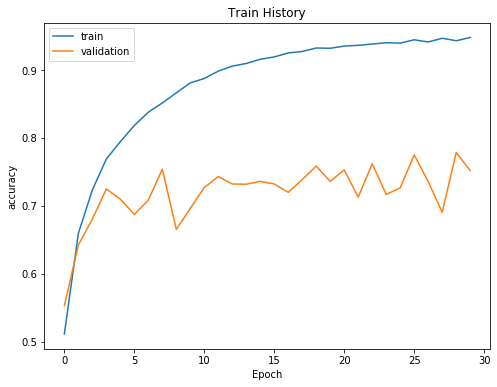

In [8]:
trainer.display('accuracy', 'val_accuracy')

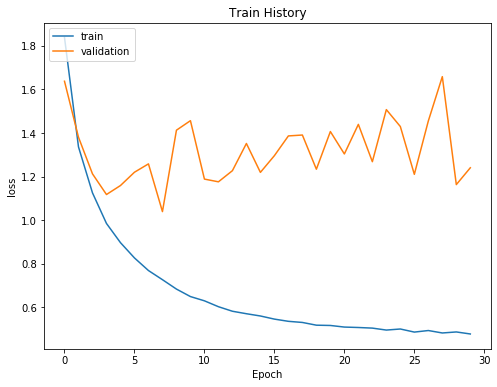

In [9]:
trainer.display('loss', 'val_loss')